In [10]:
import array as arr
My_Array = [1,2,3,4,5]

My_Array[::-1]

#My_Array[::-1]

[5, 4, 3, 2, 1]

In [26]:
num = 12321
temp = num
rev = 0
while num>0:
    dig=num%10
    rev=rev*10+dig
    num=num//10

if rev == temp:
    print('True')
else:
    print('False')

True


In [37]:
num = 13

for i in range(1, num+1):
    flag=1
    for x in range(2,i//2+1):
        if i % x == 0:
            #print(num, "is not a prime number")
            flag=0
            break
    
    if flag==1:
        print(i, end =" ")

#print(num)


1 2 3 5 7 11 13 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load the application data

app_df = pd.read_csv('./application_data.csv')

In [4]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
### inspect the data to check columns, size

app_df.shape

(307511, 122)

In [6]:
#### Find out the number of Null values in all the columns

round(app_df.isnull().sum(axis = 0)/len(app_df)*100,4).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.8723
COMMONAREA_AVG                  69.8723
COMMONAREA_MODE                 69.8723
NONLIVINGAPARTMENTS_MODE        69.4330
NONLIVINGAPARTMENTS_MEDI        69.4330
NONLIVINGAPARTMENTS_AVG         69.4330
FONDKAPREMONT_MODE              68.3862
LIVINGAPARTMENTS_MEDI           68.3550
LIVINGAPARTMENTS_MODE           68.3550
LIVINGAPARTMENTS_AVG            68.3550
FLOORSMIN_MEDI                  67.8486
FLOORSMIN_MODE                  67.8486
FLOORSMIN_AVG                   67.8486
YEARS_BUILD_MEDI                66.4978
YEARS_BUILD_AVG                 66.4978
YEARS_BUILD_MODE                66.4978
OWN_CAR_AGE                     65.9908
LANDAREA_MODE                   59.3767
LANDAREA_AVG                    59.3767
LANDAREA_MEDI                   59.3767
BASEMENTAREA_MEDI               58.5160
BASEMENTAREA_AVG                58.5160
BASEMENTAREA_MODE               58.5160
EXT_SOURCE_1                    56.3811
NONLIVINGAREA_MEDI              55.1792


In [7]:
### drop columns whose % null is around 50 or greater than 50

# this command will give the list of columns whose % null is around 50 or greater than 50
app_df[app_df.columns[app_df.isnull().mean() > 0.40]].columns

# command to drop the columns
app_df = app_df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis = 1)

In [8]:
### after dropping few columns , we have 73 columns left out

app_df.shape

(307511, 73)

In [9]:
### There are few other columns which are not required for findind the insights. We can drop those columns as well.

app_df = app_df.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis = 1)


In [10]:
app_df.shape

(307511, 53)

In [11]:
### Find out columns which has less percentage null so that we can impute them with most common value.

app_df.isnull().mean().sort_values(ascending = False).head(50)*100

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
FLAG_OWN_CAR                    0.000000
AMT_CREDIT      

Few columns have around 13% or so null percentage. We will try to impute the important variables which will be helpful in taking insights.  There are few categorical variables and others are numerical variables. 

List of categorical variables are:
1. NAME_TYPE_SUITE
2. CNT_FAM_MEMBERS
3. DAYS_LAST_PHONE_CHANGE

List of numerical variables are:
1. AMT_REQ_CREDIT_BUREAU_YEAR
2. AMT_GOODS_PRICE
3. AMT_ANNUITY
4. OBS_60_CNT_SOCIAL_CIRCLE
5. OBS_30_CNT_SOCIAL_CIRCLE

In [12]:
### In case of categorical variable, we will impute them with most repeated value. Mode will give us the most repeated value.

## NAME_TYPE_SUITE:
print('NAME_TYPE_SUITE variable can be imputed with value: ' + str(app_df.NAME_TYPE_SUITE.mode()[0]))

## CNT_FAM_MEMBERS:
print('CNT_FAM_MEMBERS variable can be imputed with value: ' + str(app_df.CNT_FAM_MEMBERS.mode()[0]))

## DAYS_LAST_PHONE_CHANGE:
print('DAYS_LAST_PHONE_CHANGE variable can be imputed with value: ' + str(app_df.DAYS_LAST_PHONE_CHANGE.mode()[0]))

NAME_TYPE_SUITE variable can be imputed with value: Unaccompanied
CNT_FAM_MEMBERS variable can be imputed with value: 2.0
DAYS_LAST_PHONE_CHANGE variable can be imputed with value: 0.0


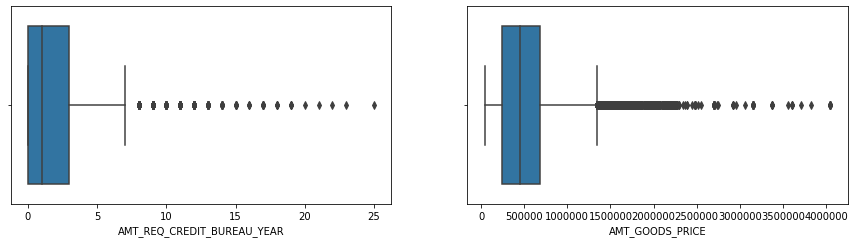

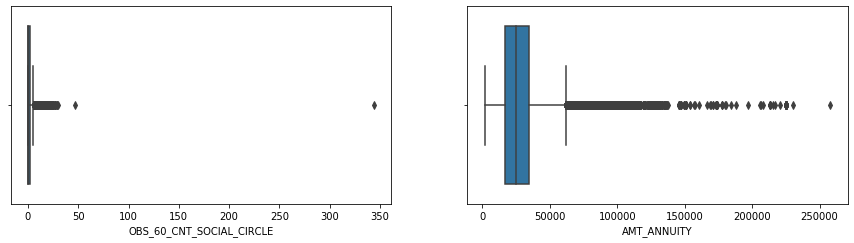

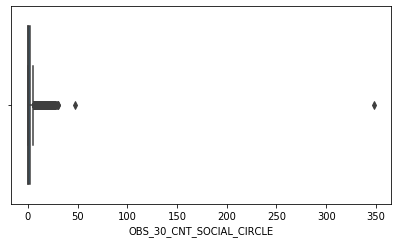

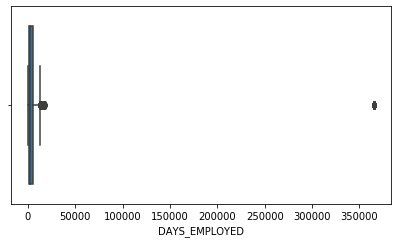

In [13]:
### In case of numerical variable, we will follow below methods:
### Replace them with Mean if the data is distributed normally.
### Replace them with Median if there are outlier present.
### Replace them with mode if replacing with most repeated value makes sense.

# Optional command, since matplotlib creates a figure by default anyway
plt.figure(figsize=(15,8))

#figure 1
plt.subplot(2, 2, 1)
sns.boxplot(app_df['AMT_REQ_CREDIT_BUREAU_YEAR'])

plt.subplot(2, 2, 2)
sns.boxplot(app_df['AMT_GOODS_PRICE'])

#figure 2
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
sns.boxplot(app_df['OBS_60_CNT_SOCIAL_CIRCLE'])

plt.subplot(2, 2, 2)
sns.boxplot(app_df['AMT_ANNUITY'])

#figure 3
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
sns.boxplot(app_df['OBS_30_CNT_SOCIAL_CIRCLE'])

plt.figure(figsize=(15,8))
plt.subplot(2, 2, 2)
sns.boxplot(abs(app_df['DAYS_EMPLOYED']))

plt.show()


Once box plot plotted, we find that their are outliers for each variable. We will impute each variable with their median value.

In [96]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [267]:
### finding out all the categorical columns in dataframe.

cols = app_df.columns
num_cols = app_df._get_numeric_data().columns

list(set(cols) - set(num_cols))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'INCOME_RANGE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'CREDIT_RANGE',
 'AGE_GROUP']

In [97]:
### After observation we find out that there are many columns which can be in different data types than their current data type

#CNT_FAM_MEMBERS - this column currently in float type. It should be int.

#change data type from float to int. 
# There are 2 rows in column which are empty. This does not allow us to convert it to int. So, we can impute 2 rows with 0 as
# blank value can be considered as 0 family members.

app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].fillna(0)
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].astype('int64')

In [98]:
### We need to change DAYS_BIRTH and DAYS_EMPLOYED variable into years. Data for both variable into negative we need to convert 
### them to positive values. 

app_df['DAYS_BIRTH'] = abs(app_df['DAYS_BIRTH'])
app_df['DAYS_BIRTH'] = round(app_df['DAYS_BIRTH']/365)
app_df['DAYS_BIRTH'] = app_df['DAYS_BIRTH'].astype('int64') 
app_df.rename(columns={'DAYS_BIRTH': 'AGE'}, inplace = True)

app_df['DAYS_EMPLOYED'] = abs(app_df['DAYS_EMPLOYED'])
app_df['DAYS_EMPLOYED'] = round(app_df['DAYS_EMPLOYED']/365)
app_df['DAYS_EMPLOYED'] = app_df['DAYS_EMPLOYED'].astype('int64') 
app_df.rename(columns={'DAYS_EMPLOYED': 'EMPLOYEMENT_EXPERIENCE'}, inplace = True)

### Also we need to convert all continous variables into integer.

app_df['AMT_INCOME_TOTAL'] = app_df['AMT_INCOME_TOTAL'].astype('int64')
app_df['AMT_CREDIT'] = app_df['AMT_CREDIT'].astype('int64')


In [99]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
            'OBS_30_CNT_SOCIAL_CIRCLE']
app_df['AMT_INCOME_TOTAL'] = pd.to_numeric(app_df['AMT_INCOME_TOTAL'], errors='coerce')


In [100]:
### rounding off the numerical variable float data. We are unable to convert variable to numeric using python existing 
### functions. For now, we have rounded off as alternate.

app_df['AMT_ANNUITY'] = round(app_df['AMT_ANNUITY'])
app_df['AMT_GOODS_PRICE'] = round(app_df['AMT_GOODS_PRICE'])
app_df['OBS_60_CNT_SOCIAL_CIRCLE'] = round(app_df['OBS_60_CNT_SOCIAL_CIRCLE'])
app_df['OBS_30_CNT_SOCIAL_CIRCLE'] = round(app_df['OBS_30_CNT_SOCIAL_CIRCLE'])

In [101]:
### Making buckets for Age and Income variable.Both are continuous variables. It would be difficult to get insight out for 
### continous these variable. If we divide them into category groups then we can get more accurate insights.

### Dividing Age into categorical groups

#sns.boxplot(app_df['AGE']) 
## This gives me the range of AGE from 20 to 70.

app_df['AGE_GROUP'] = pd.cut(app_df.AGE, [20,30,40,50,60,70], 
                  labels = ['21-30 years', '31-40 years', '41-50 years', '51-60 years', '61-70 years'])

In [206]:
### Dividing AMT_INCOME_TOTAL into range

app_df['AMT_INCOME_TOTAL'].quantile([0, 0.75, 0.95, 0.99, 1])

### Quantile gives us that 99% data lies within range 25k to 472k. So, we will be binning income within this range.

app_df['INCOME_RANGE'] = pd.cut(app_df.AMT_INCOME_TOTAL, [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 
                                                          225000, 250000, 300000, 325000, 350000, 375000, 400000, 425000
                                                          ,450000, 475000, 500000, 525000, 550000, 120000000], 
                                labels = ['0-25K', '25-50K', '50-75K', '75-100K', '100-125K', '125-150K', '150-175K',
                                         '200-225K', '225-250K', '250-275K', '275-300K', '300-325K', '325-350K', '350-375K',
                                         '375-400K', '400-425K', '425-450K', '450-475K', '475-500K', '500-525K', '525-550K',
                                         '550K+'])


In [123]:
### Dividing AMT_CREDIT into range

app_df['AMT_CREDIT'].quantile([0,0.50, 0.75, 0.95, 0.99, 1])

app_df['CREDIT_RANGE'] = pd.cut(app_df.AMT_CREDIT, [0, 45000, 250000, 500000, 750000, 4050000],
                               labels = ['0-45K', '45K-250K', '250K-500K', '500K-750K', '750K+'])

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

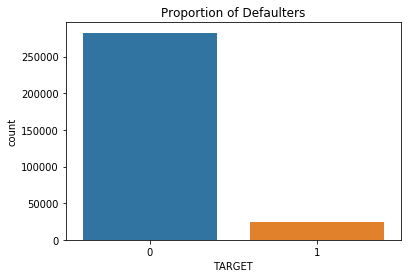

In [124]:
### finding the imbalance percentage

sns.countplot(x = 'TARGET',data = app_df).set_title('Proportion of Defaulters')

app_df.TARGET.value_counts(normalize= True)

In [191]:
### Dividing the dataframe into two dataframes. i.e. with Target = 1 and Target = 0

app_df_0 = app_df[app_df.TARGET == 0]

app_df_1 = app_df[app_df.TARGET == 1]

In [169]:
app_df_0['NAME_EDUCATION_TYPE'] = app_df_0['NAME_EDUCATION_TYPE'].apply(lambda x: 'Secondary' if x == 'Secondary / secondary special' else x)
app_df_1['NAME_EDUCATION_TYPE'] = app_df_1['NAME_EDUCATION_TYPE'].apply(lambda x: 'Secondary' if x == 'Secondary / secondary special' else x)

C:\Users\neerajk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\neerajk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Univariate Analysis

### Analysis based on Education Type

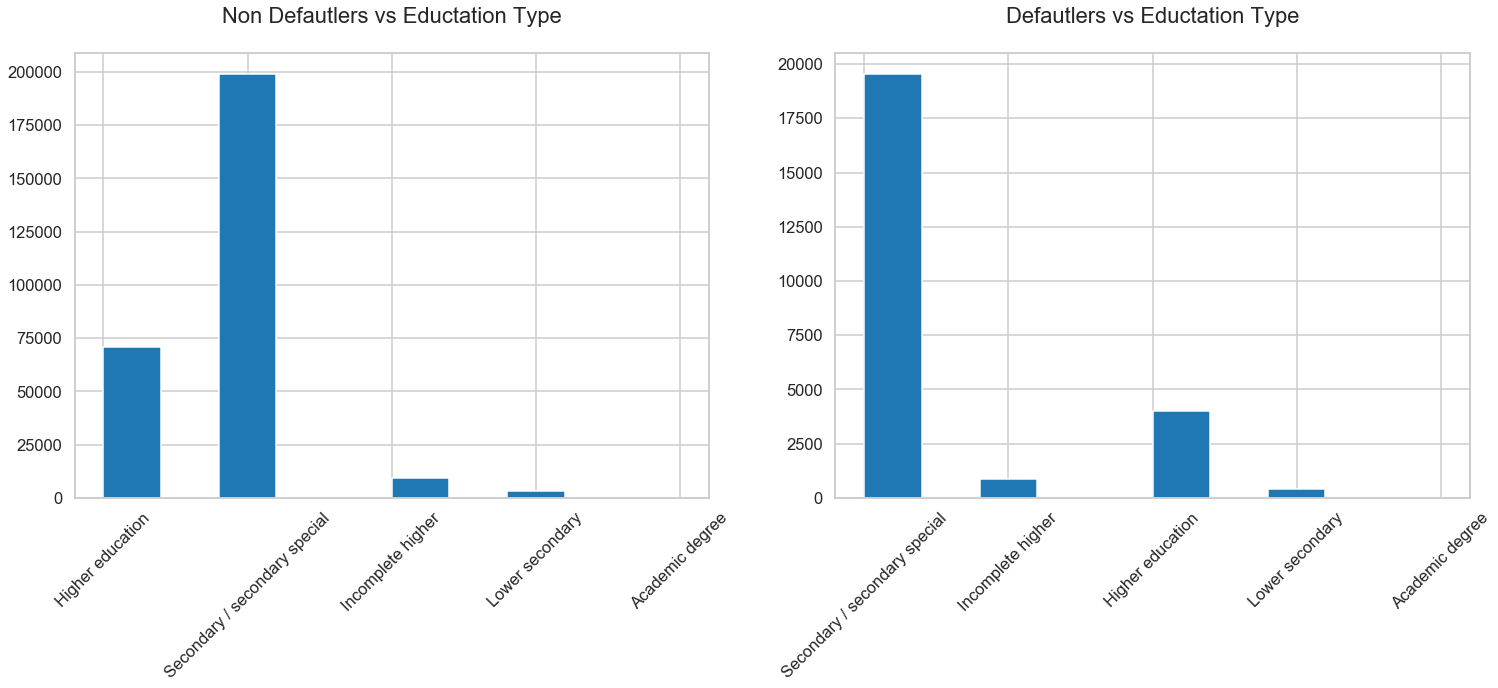

In [218]:
plt.figure(figsize = (25,18))

plt.subplot(2,2,1)
plt.title('Non Defautlers vs Eductation Type')
plt.xticks(rotation=45)
plt.hist(app_df_0['NAME_EDUCATION_TYPE'], bins=10)
#sns.countplot(x = 'NAME_EDUCATION_TYPE',data = app_df_0).set_title('Non Defautlers vs Eductation Type')

plt.subplot(2,2,2)
plt.title('Defautlers vs Eductation Type')
plt.xticks(rotation=45)
plt.hist(app_df_1['NAME_EDUCATION_TYPE'], bins=10)

plt.show()
#sns.countplot(x = 'NAME_EDUCATION_TYPE',data = app_df_1).set_title('Defautlers vs Eductation Type')

### Analysis based on Income Range

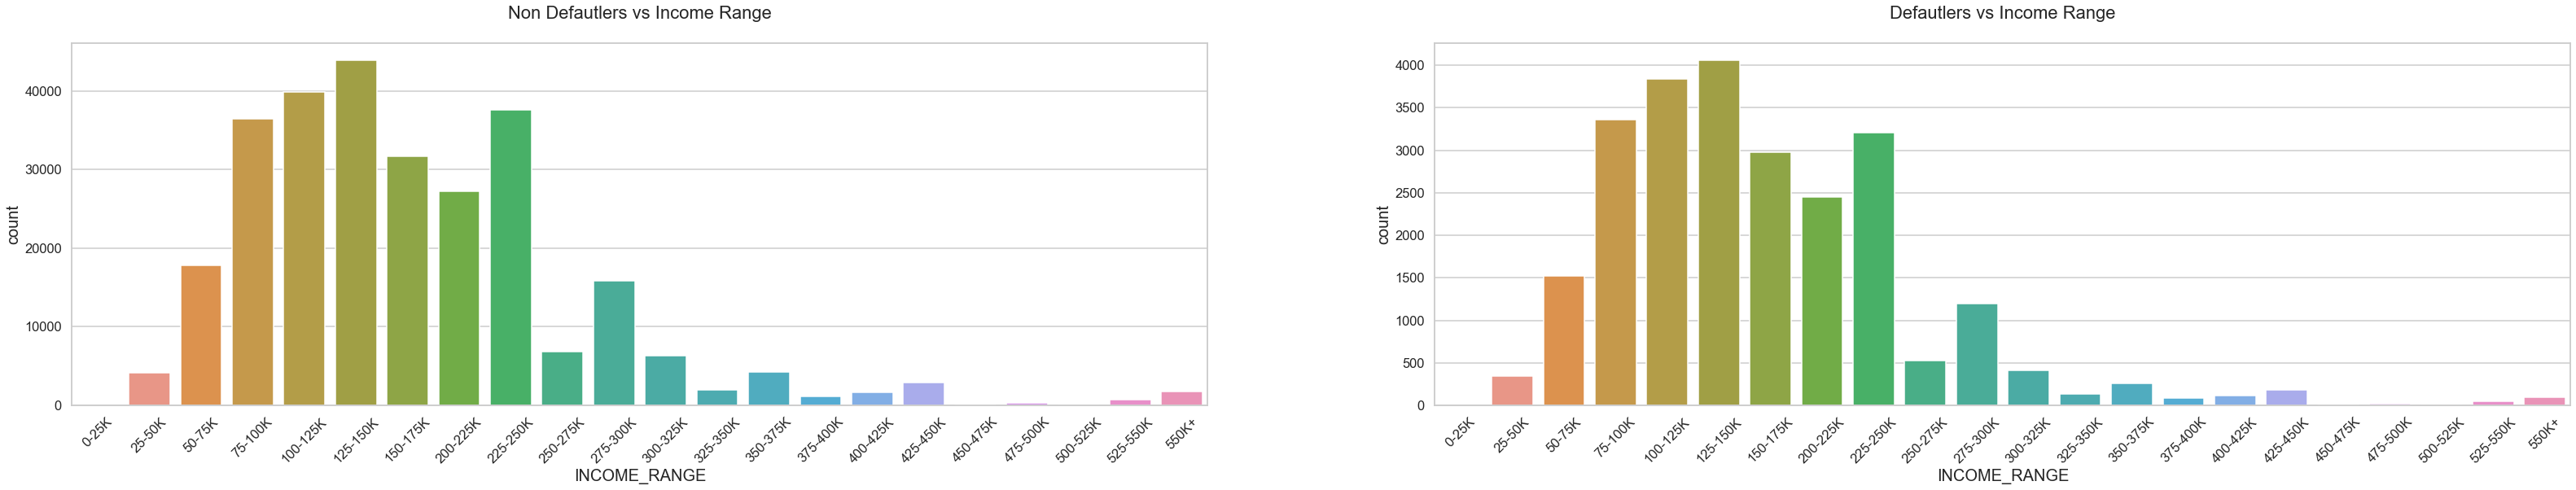

In [232]:
plt.figure(figsize = (55,18))

plt.subplot(2,2,1)
plt.xticks(rotation=45)
plt.title('Non Defautlers vs Income Range')
sns.countplot(app_df_0['INCOME_RANGE'])

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.title('Defautlers vs Income Range')
sns.countplot(app_df_1['INCOME_RANGE'])

plt.show()

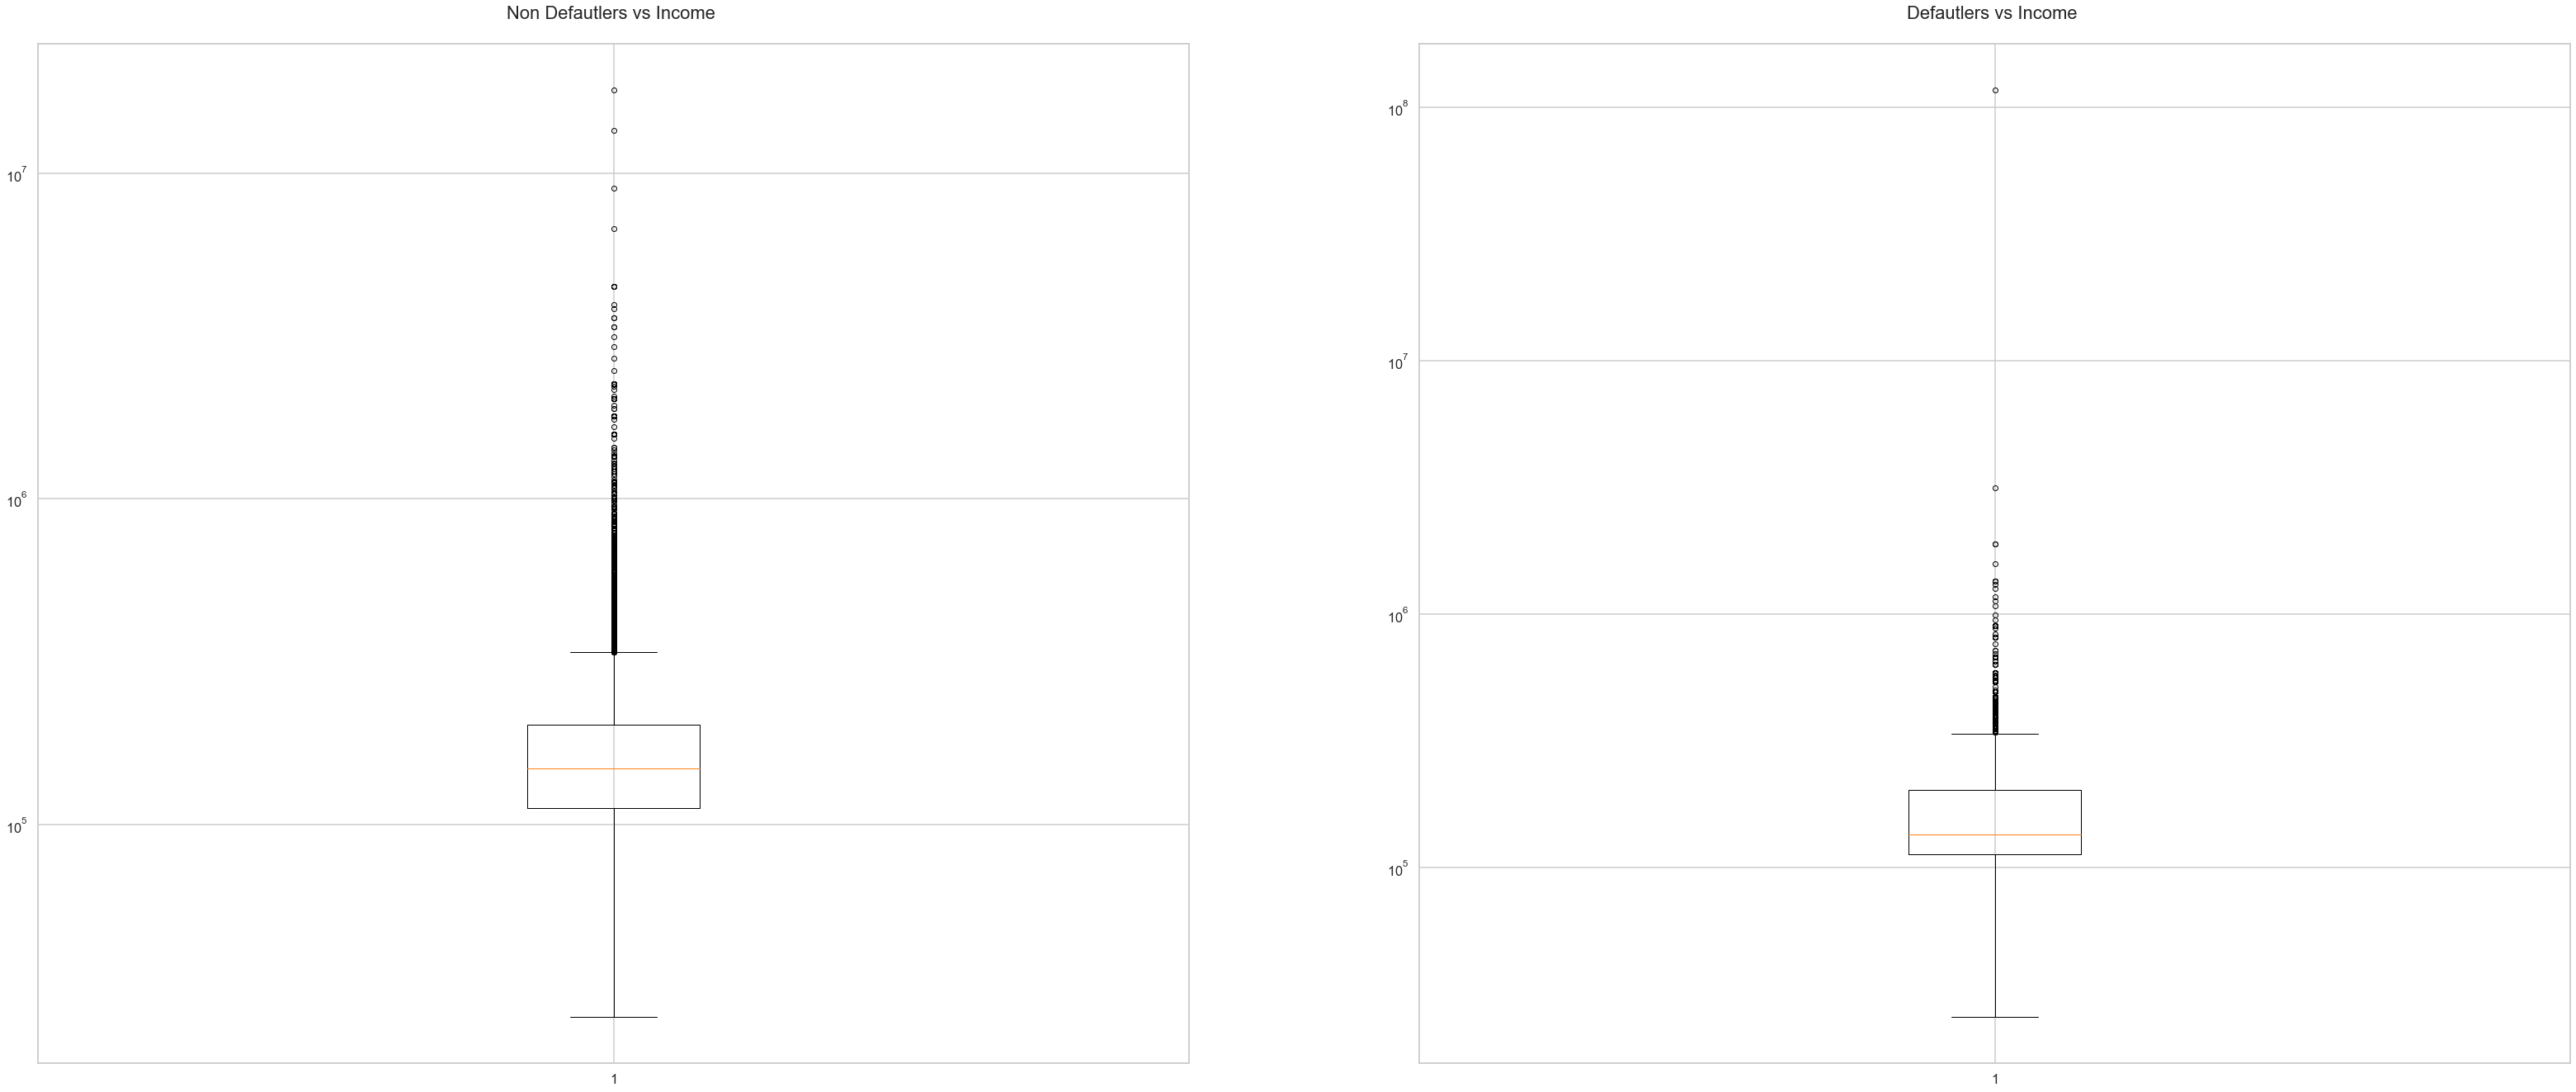

In [260]:
plt.figure(figsize = (55,50))

plt.subplot(2,2,1)
plt.yscale('log')
plt.title('Non Defautlers vs Income ')
plt.boxplot(app_df_0['AMT_INCOME_TOTAL'])

plt.subplot(2,2,2)
plt.yscale('log')
plt.title('Defautlers vs Income ')
plt.boxplot(app_df_1['AMT_INCOME_TOTAL'])

plt.show()

From the aboe plot, we can infer that,
1. We have highest defaulter probability in the income range 25K to 112K i.e. less than median
2. As the salary increases, the chances of an applicant being a defaulter also reduces

### Analysis based on Credit Range

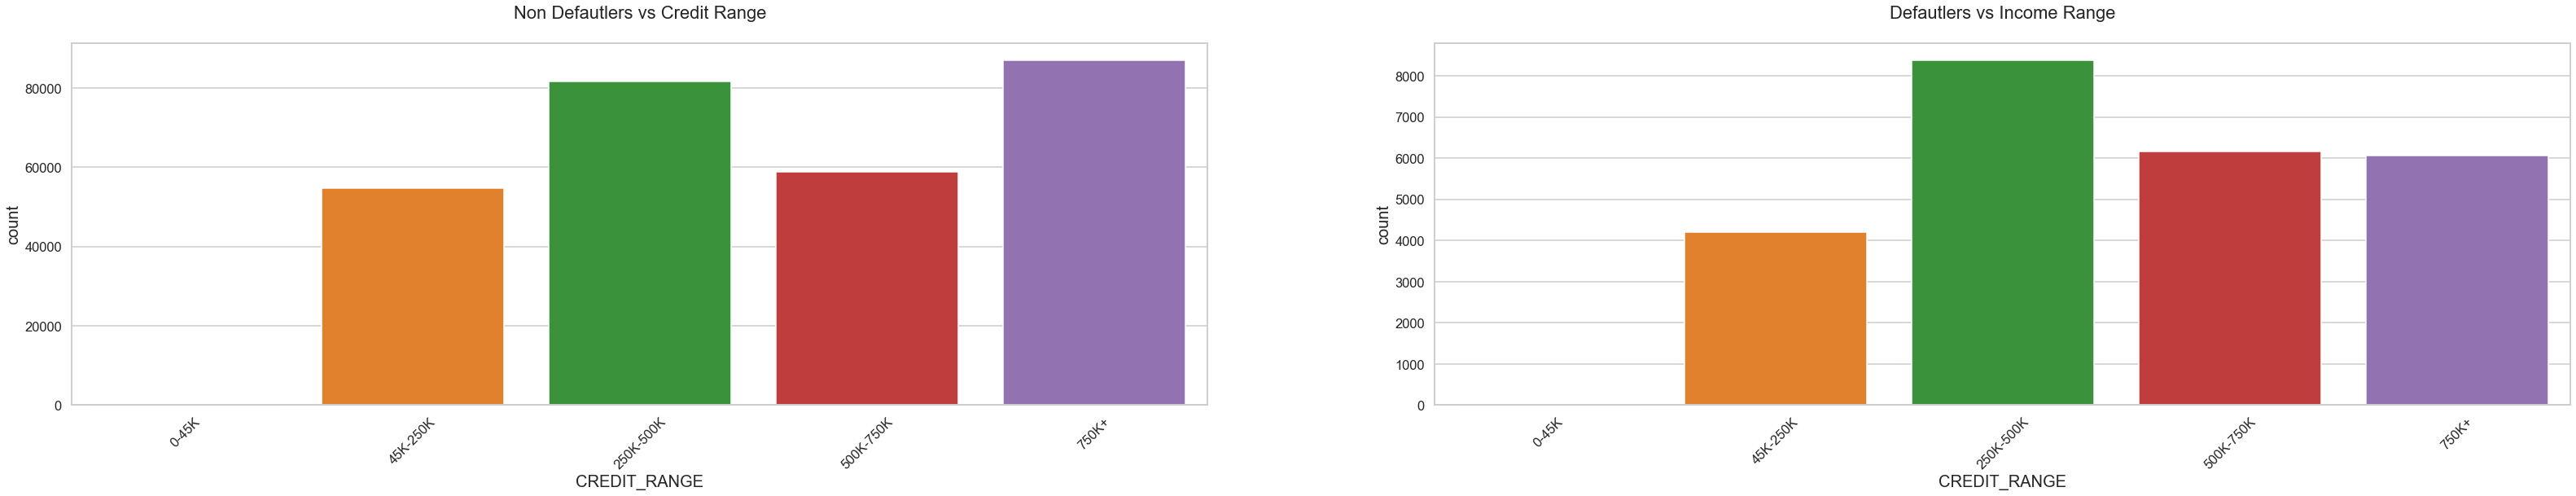

In [243]:
plt.figure(figsize = (55,18))

plt.subplot(2,2,1)
plt.xticks(rotation=45)
plt.title('Non Defautlers vs Credit Range')
sns.countplot(app_df_0['CREDIT_RANGE'])

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.title('Defautlers vs Income Range')
sns.countplot(app_df_1['CREDIT_RANGE'])

plt.show()

 From above point we can infer that, 
1. We wil have more defaulters if credit loan lies within 250K to 500K.
2. As the credit load increase say above 750K, the chances of an applicant being a defaulter decrease.

### Analysis based on Income Type

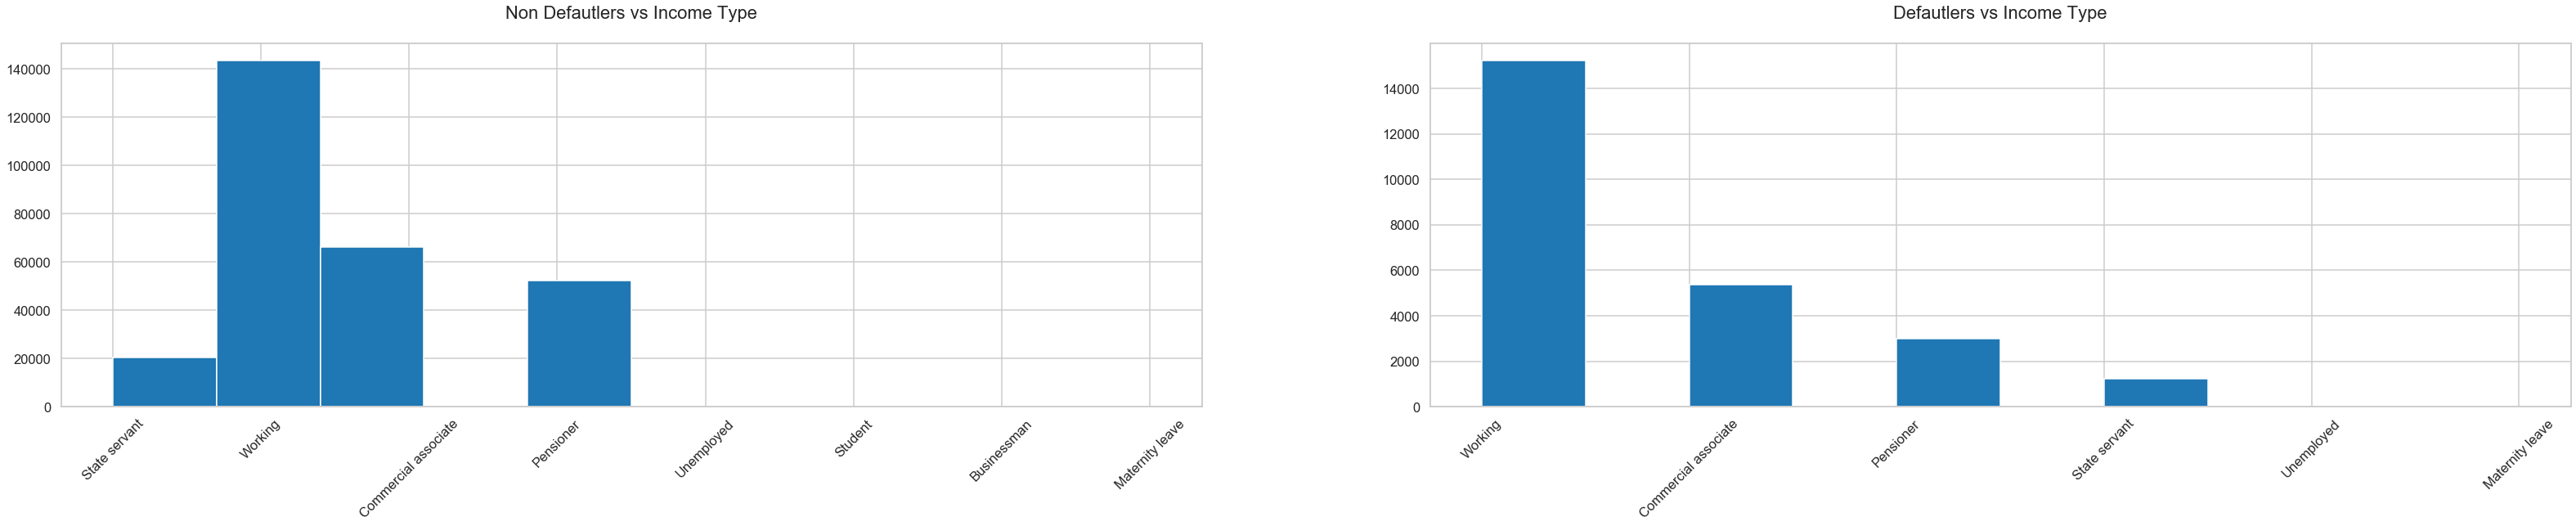

In [255]:
plt.figure(figsize = (55,18))

plt.subplot(2,2,1)
plt.xticks(rotation=45)
plt.title('Non Defautlers vs Income Type')
plt.hist(app_df_0['NAME_INCOME_TYPE'], bins = 10)

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.title('Defautlers vs Income Type')
plt.hist(app_df_1['NAME_INCOME_TYPE'], bins = 10)

plt.show()

From the above plot, we can infer that,
1. Chances of defaulter are more if any applicant is either Commerical associate, Pensioner or State servant as compared to Working.


### Analysis based on Gender

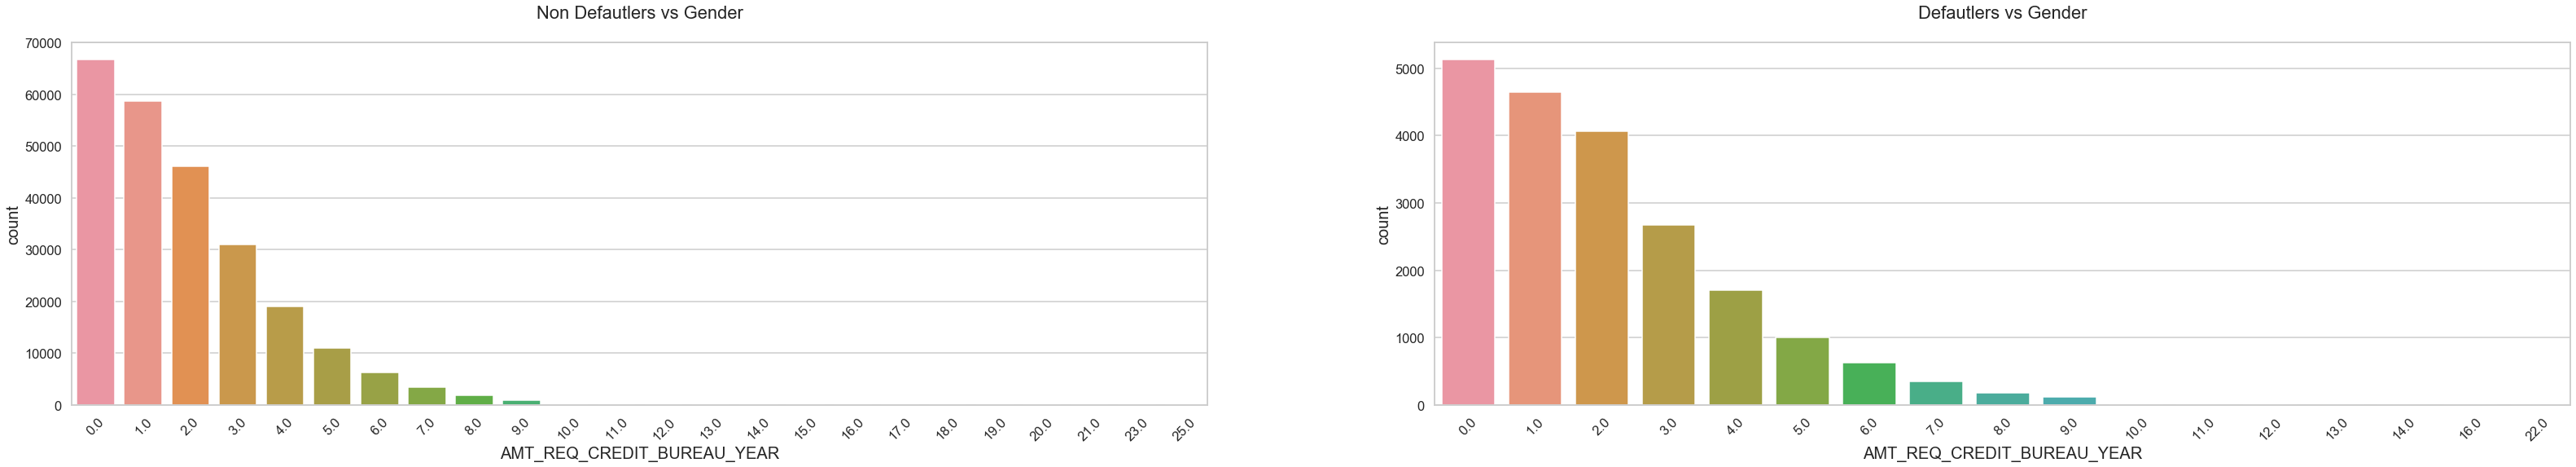

In [315]:
plt.figure(figsize = (55,18))

plt.subplot(2,2,1)
plt.xticks(rotation=45)
plt.title('Non Defautlers vs Gender')
sns.countplot(app_df_0['AMT_REQ_CREDIT_BUREAU_YEAR'])

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.title('Defautlers vs Gender')
sns.countplot(app_df_1['AMT_REQ_CREDIT_BUREAU_YEAR'])

plt.show()

From above plot we can infer that, 
1. Probability of female being defautlers than male is higher.
2. There are more number of female applicants.

### Finding  correlation for numerical variables 

#### For Target = 0

In [297]:
corr = app_df_0.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['Var1', 'Var2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)

corrdf0['Correlation'] = corrdf0['Correlation'].abs();
corrdf0.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
1342     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
542                FLAG_EMP_PHONE      EMPLOYEMENT_EXPERIENCE         1.00
250               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
839   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
740               CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1384     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1007  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
1133      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
251               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
209                   AMT_ANNUITY                  AMT_CREDIT         0.77

#### For Target = 1

In [298]:
corr = app_df_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['Var1', 'Var2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)

corrdf0['Correlation'] = corrdf0['Correlation'].abs();
corrdf0.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
1342     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
542                FLAG_EMP_PHONE      EMPLOYEMENT_EXPERIENCE         1.00
250               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
839   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
740               CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
1384     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1007  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1133      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
251               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75
209                   AMT_ANNUITY                  AMT_CREDIT         0.75

## Bivariate Analysis

### Analysis - Based on Age Group vs. Income Range

In [278]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

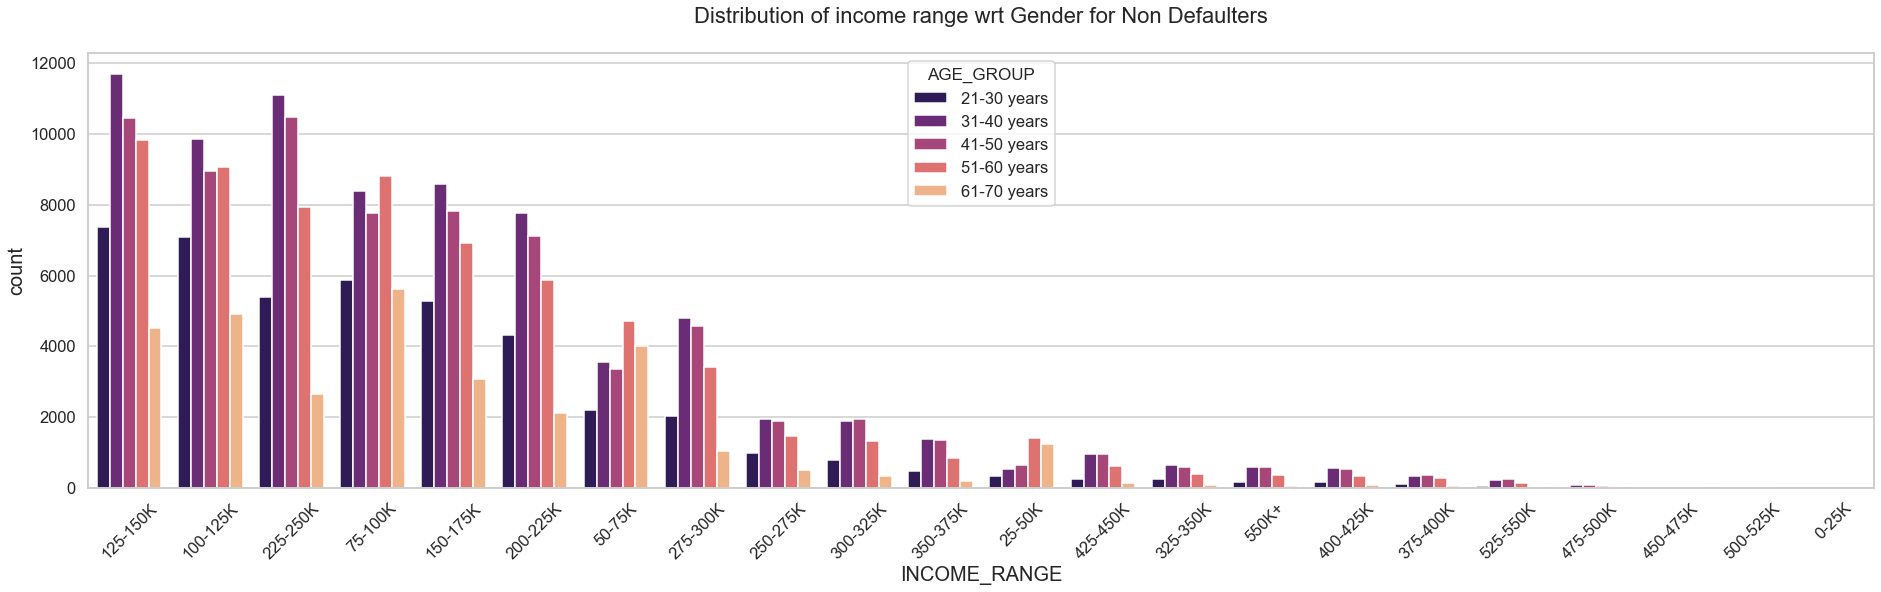

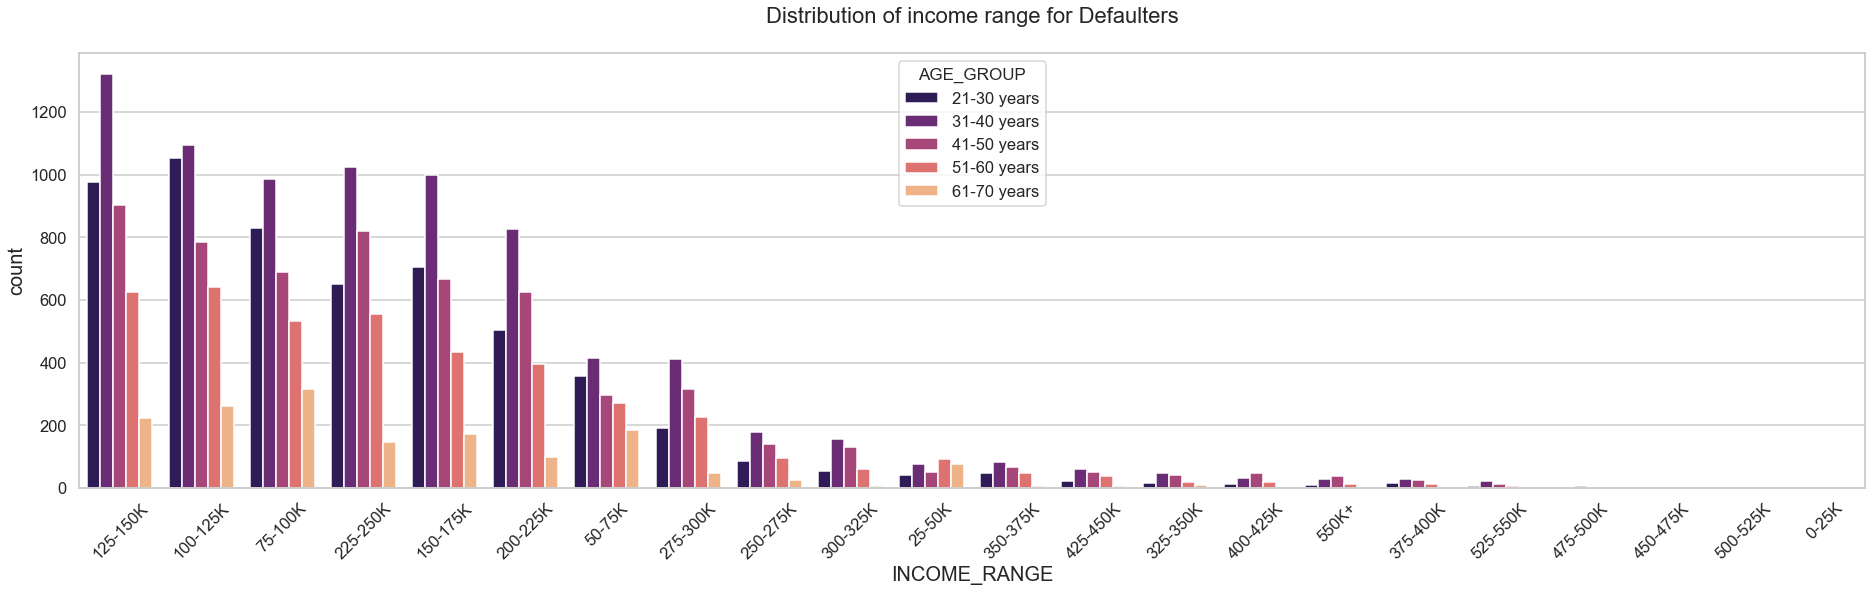

In [280]:
uniplot(app_df_0[app_df_0.CODE_GENDER != 'XNA'],col='INCOME_RANGE',title='Distribution of income range wrt Gender for Non Defaulters',hue='AGE_GROUP')

uniplot(app_df_1,col='INCOME_RANGE',title='Distribution of income range for Defaulters',hue='AGE_GROUP')

From above plot we can infer that,
1. Applicant whose age is greater than 40 years will have less chances of defaulters.
2. Applicant whose age is between 31 - 40 year and salary range between 75K to 150K will belong to defaulters.

### Analysis - Based on Gender vs Income Type

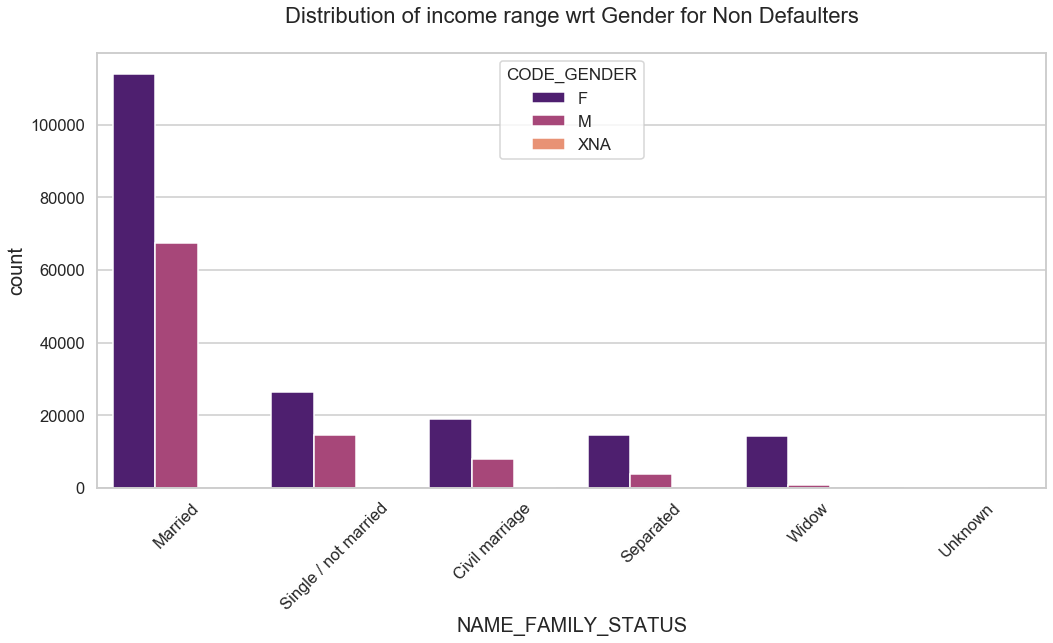

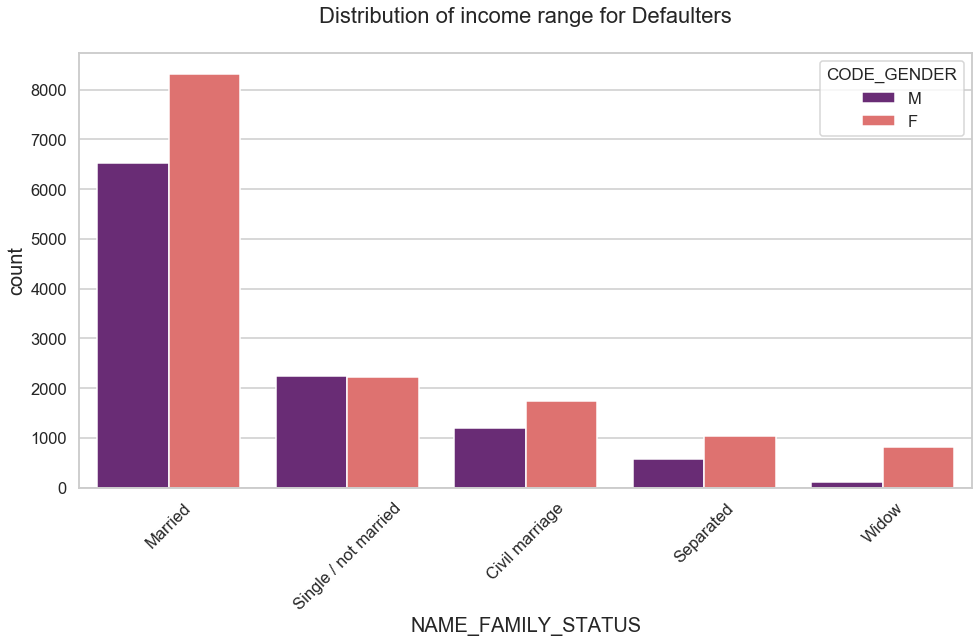

In [287]:
uniplot(app_df_0, col='NAME_FAMILY_STATUS',title='Distribution of income range wrt Gender for Non Defaulters',hue='CODE_GENDER')

uniplot(app_df_1 ,col='NAME_FAMILY_STATUS',title='Distribution of income range for Defaulters',hue='CODE_GENDER')

From the above plot, we can infer that,
1. Single men will have difficulties in re-paying the load amount. 

### Analysis - Between Family members vs Number of childrens

In [ ]:
plt.bar(app_df_0.)

In [217]:
app_df.groupby(['DAYS_LAST_PHONE_CHANGE'])['TARGET'].mean().plot.scatter()
plt.show()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'